In [9]:
#Paquetes:

import numpy as np
from PIL import Image #Se importa con pip install pillow, sirve para manejar imágenes
import matplotlib.pyplot as plt

In [25]:
def create_sine_pattern(size=480, cycles=10):
    # size: dimensión (cuadrada)
    # cycles: número de ciclos de seno a lo largo de la imagen
    x = np.linspace(0, 2*np.pi * cycles, size) #es decir el periodo es cycles
    y = np.linspace(0, 2*np.pi * cycles, size)
    X, Y = np.meshgrid(x, y) 
    # patrón senoidal en una dirección
    pattern = (np.sin(X) + 1) / 2  # valores entre 0 y 1
    img_arr = (pattern * 255).astype(np.uint8) #al multiplicar por 255 lo llevamos a [0, 255]
    return img_arr, Image.fromarray(img_arr, mode='L') #mode L indica escala de grises IMPORTANTE GUARDARLO COMO ARRAY PARA HACER OPERACIONES

# Ejemplo:
# Desempaquetar
arr, img = create_sine_pattern(size=480, cycles=10)

# Ahora sí:
print(arr.shape)   # array NumPy para FFT -> (480,480)
img.show()         # objeto PIL.Image -> lo abre en visor

#img.save("sine_pattern_480.png")  De esa forma se guarda la imágen

(480, 480)


/tmp/ipykernel_28411/282621275.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return img_arr, Image.fromarray(img_arr, mode='L') #mode L indica escala de grises IMPORTANTE GUARDARLO COMO ARRAY PARA HACER OPERACIONES


# FFT

NumPy en Python es el que implementa la transformada discreta de Fourier (DFT) y por supuesto la transformada rápida (FFT). Trabajamos entonces con señales finitas y además la máquina asume periodicidad. Toda la documentación de su implementación se encuentra consignada en: https://numpy.org/doc/stable/reference/routines.fft.html 

## Implementación 

Como brochazo de la documentación es bueno recordar la definición de DFT tal como el profe la dio:

$$
X[k] = \sum_{n=0}^{N-1} x[n]  e^{-j \tfrac{2\pi}{N}kn}, 
\quad k = 0,1,2,\dots,N-1
$$

Es claro entonces que k denota dominio frecuencial y n dominio espacial/temporal. Acá es importante notar de la documentación como llamar la inversa: 

- `np.fft.fft(x)` - esta es la manera de hacer una transformada de Fourier **OJO** en 1D
- `np.fft.ifft(x)` - eso hace la inversa en 1D

Para 2 dimensiones se implementa con la notación:

- `np.fft.fft2(x)`

Y como nos imaginamos para n-dimensiones de la siguiente manera: 

- `np.fft.fftn()`

Cabe aclarar que existe también la implementación para cuando nuestro input es real, simplemente se hace:

- `np.fft.rfft(x)`

Entonces, centrémonos en qué recibe la función `numpy.fft.fft(a, n=None, axis=-1, norm=None)`


## Parámetros de la función FFT

### `a` (array_like)
**Entrada** que quieres transformar (vector 1D, o si es un array multidimensional, aplica la FFT a lo largo del eje que indiques).  
Puede ser **real** o **complejo**.

### `n` (opcional, int)
Número de puntos de la FFT.  
- Si `n` es **mayor** que la longitud de `a` → rellena con **ceros al final**  
- Si `n` es **menor** → **trunca** `a`  
- Si no lo especificas → usa la longitud de `a` en el eje especificado

### `axis` (opcional, int, por defecto = -1)
El eje del array sobre el que se calcula la FFT.  
- **-1** significa "último eje" (ejemplo típico: en un array 2D calcula la FFT de cada fila)

### `norm` (opcional, {None, "ortho"})
Normalización.  

| Valor | Descripción |
|-------|-------------|
| **None** (por defecto) | La directa no lleva factor $1/N$. La inversa (`ifft`) sí lleva $1/N$ |
| **"ortho"** | Hace la FFT y la IFFT simétricamente normalizadas, con factor $1/\sqrt{N}$ |







In [8]:

# Señal de ejemplo (1D)
x = np.array([1, 2, 3, 4], dtype=float)
print("Señal original x:", x)

# ===== Caso 1: básico =====
X1 = np.fft.fft(x)
print("\nCaso 1: fft(x) -> (n=None, axis=-1, norm=None)")
print(X1)

# ===== Caso 2: con n mayor (zero-padding) =====
X2 = np.fft.fft(x, n=8)  # rellena con 4 ceros
print("\nCaso 2: fft(x, n=8) -> zero padding hasta longitud 8")
print(X2)

# ===== Caso 3: con n menor (truncado) =====
X3 = np.fft.fft(x, n=2)  # se queda solo con los dos primeros valores
print("\nCaso 3: fft(x, n=2) -> truncado a longitud 2")
print(X3)

# ===== Caso 4: norm="ortho" =====
X4 = np.fft.fft(x, norm="ortho")
print("\nCaso 4: fft(x, norm='ortho') -> normalización simétrica")
print(X4)

# ===== Caso 5: eje específico en un array 2D =====
X = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]], dtype=float)

# FFT a lo largo de columnas (axis=0)
X5 = np.fft.fft(X, axis=0)
print("\nCaso 5: fft(X, axis=0) -> FFT columna a columna")
print(X5)

# FFT a lo largo de filas (axis=1)
X6 = np.fft.fft(X, axis=1)
print("\nCaso 6: fft(X, axis=1) -> FFT fila a fila")
print(X6)

Señal original x: [1. 2. 3. 4.]

Caso 1: fft(x) -> (n=None, axis=-1, norm=None)
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]

Caso 2: fft(x, n=8) -> zero padding hasta longitud 8
[10.        +0.j         -0.41421356-7.24264069j -2.        +2.j
  2.41421356-1.24264069j -2.        +0.j          2.41421356+1.24264069j
 -2.        -2.j         -0.41421356+7.24264069j]

Caso 3: fft(x, n=2) -> truncado a longitud 2
[ 3.+0.j -1.+0.j]

Caso 4: fft(x, norm='ortho') -> normalización simétrica
[ 5.+0.j -1.+1.j -1.+0.j -1.-1.j]

Caso 5: fft(X, axis=0) -> FFT columna a columna
[[ 6.+0.j  8.+0.j 10.+0.j 12.+0.j]
 [-4.+0.j -4.+0.j -4.+0.j -4.+0.j]]

Caso 6: fft(X, axis=1) -> FFT fila a fila
[[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
 [26.+0.j -2.+2.j -2.+0.j -2.-2.j]]


# fftshift???

Una parte importante que no entendí en clase, qué hace shift? creo que se entiende mejor gráficamente con la imágen cuadrada que definimos antes: 

/tmp/ipykernel_28411/282621275.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return img_arr, Image.fromarray(img_arr, mode='L') #mode L indica escala de grises IMPORTANTE GUARDARLO COMO ARRAY PARA HACER OPERACIONES


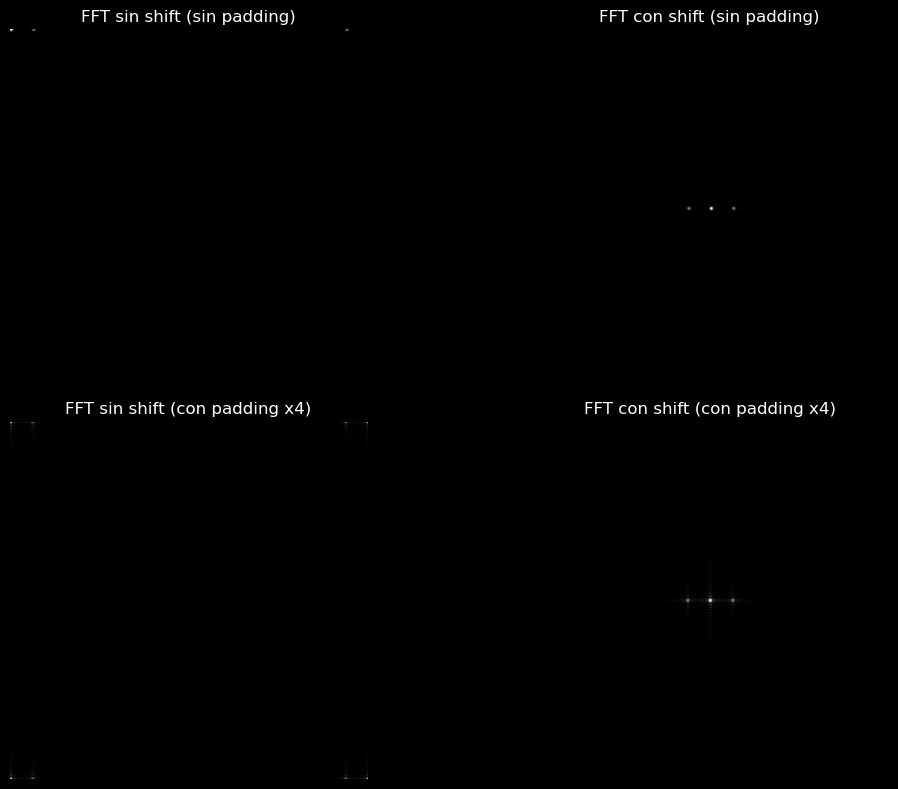

In [29]:

# Imagen base
arr, img_pil = create_sine_pattern(128, cycles=8)

# === FFT normal ===
U = np.fft.fft2(arr)   # usamos el ndarray
U_shift = np.fft.fftshift(U)

# === FFT con zero-padding (factor 4) === LO QUE DECIA EL PROFE DE MEJORAR LA RESOLUCIÓN EN EL ESPECTRO
pad_factor = 4
U_pad = np.fft.fft2(arr, s=(arr.shape[0]*pad_factor, arr.shape[1]*pad_factor))
U_pad_shift = np.fft.fftshift(U_pad)

# === Graficar ===
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(np.abs(U), cmap="gray")
plt.title("FFT sin shift (sin padding)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(np.abs(U_shift), cmap="gray")
plt.title("FFT con shift (sin padding)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(np.abs(U_pad), cmap="gray")
plt.title("FFT sin shift (con padding x4)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(np.abs(U_pad_shift), cmap="gray")
plt.title("FFT con shift (con padding x4)")
plt.axis("off")

plt.tight_layout()
plt.show()